In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import torch

import warnings; warnings.simplefilter('ignore')

from brainpedia.brainpedia import BrainPedia
from brainpedia.fmri_processing import invert_preprocessor_scaling
from models.ICW_FMRI_GAN import Critic, Generator
from nilearn import plotting
from torch.autograd import Variable
from tqdm import tqdm

Fix random seed for reproducibility.

In [2]:
np.random.seed(1)

CUDA = torch.cuda.is_available()
if CUDA:
    torch.cuda.manual_seed(1)
    print("CUDA is available...")
else:
    torch.manual_seed(1)
    print("CUDA is NOT available...")

CUDA is NOT available...


# Data

Download the full [Neurovault](https://neurovault.org) Collection 1952 [BrainPedia](https://neurovault.org/collections/1952/) dataset.

In [3]:
BrainPedia.downloadIfNecessary()

Reading local neurovault data.
Already fetched 1 image
Already fetched 2 images
Already fetched 3 images
Already fetched 4 images
Already fetched 5 images
Already fetched 6 images
Already fetched 7 images
Already fetched 8 images
Already fetched 9 images
Already fetched 10 images
Already fetched 11 images
Already fetched 12 images
Already fetched 13 images
Already fetched 14 images
Already fetched 15 images
Already fetched 16 images
Already fetched 17 images
Already fetched 18 images
Already fetched 19 images
Already fetched 20 images
Already fetched 21 images
Already fetched 22 images
Already fetched 23 images
Already fetched 24 images
Already fetched 25 images
Already fetched 26 images
Already fetched 27 images
Already fetched 28 images
Already fetched 29 images
Already fetched 30 images
Already fetched 31 images
Already fetched 32 images
Already fetched 33 images
Already fetched 34 images
Already fetched 35 images
Already fetched 36 images
Already fetched 37 images
Already fetched 3

Already fetched 316 images
Already fetched 317 images
Already fetched 318 images
Already fetched 319 images
Already fetched 320 images
Already fetched 321 images
Already fetched 322 images
Already fetched 323 images
Already fetched 324 images
Already fetched 325 images
Already fetched 326 images
Already fetched 327 images
Already fetched 328 images
Already fetched 329 images
Already fetched 330 images
Already fetched 331 images
Already fetched 332 images
Already fetched 333 images
Already fetched 334 images
Already fetched 335 images
Already fetched 336 images
Already fetched 337 images
Already fetched 338 images
Already fetched 339 images
Already fetched 340 images
Already fetched 341 images
Already fetched 342 images
Already fetched 343 images
Already fetched 344 images
Already fetched 345 images
Already fetched 346 images
Already fetched 347 images
Already fetched 348 images
Already fetched 349 images
Already fetched 350 images
Already fetched 351 images
Already fetched 352 images
A

Already fetched 689 images
Already fetched 690 images
Already fetched 691 images
Already fetched 692 images
Already fetched 693 images
Already fetched 694 images
Already fetched 695 images
Already fetched 696 images
Already fetched 697 images
Already fetched 698 images
Already fetched 699 images
Already fetched 700 images
Already fetched 701 images
Already fetched 702 images
Already fetched 703 images
Already fetched 704 images
Already fetched 705 images
Already fetched 706 images
Already fetched 707 images
Already fetched 708 images
Already fetched 709 images
Already fetched 710 images
Already fetched 711 images
Already fetched 712 images
Already fetched 713 images
Already fetched 714 images
Already fetched 715 images
Already fetched 716 images
Already fetched 717 images
Already fetched 718 images
Already fetched 719 images
Already fetched 720 images
Already fetched 721 images
Already fetched 722 images
Already fetched 723 images
Already fetched 724 images
Already fetched 725 images
A

Already fetched 1071 images
Already fetched 1072 images
Already fetched 1073 images
Already fetched 1074 images
Already fetched 1075 images
Already fetched 1076 images
Already fetched 1077 images
Already fetched 1078 images
Already fetched 1079 images
Already fetched 1080 images
Already fetched 1081 images
Already fetched 1082 images
Already fetched 1083 images
Already fetched 1084 images
Already fetched 1085 images
Already fetched 1086 images
Already fetched 1087 images
Already fetched 1088 images
Already fetched 1089 images
Already fetched 1090 images
Already fetched 1091 images
Already fetched 1092 images
Already fetched 1093 images
Already fetched 1094 images
Already fetched 1095 images
Already fetched 1096 images
Already fetched 1097 images
Already fetched 1098 images
Already fetched 1099 images
Already fetched 1100 images
Already fetched 1101 images
Already fetched 1102 images
Already fetched 1103 images
Already fetched 1104 images
Already fetched 1105 images
Already fetched 1106

Already fetched 1483 images
Already fetched 1484 images
Already fetched 1485 images
Already fetched 1486 images
Already fetched 1487 images
Already fetched 1488 images
Already fetched 1489 images
Already fetched 1490 images
Already fetched 1491 images
Already fetched 1492 images
Already fetched 1493 images
Already fetched 1494 images
Already fetched 1495 images
Already fetched 1496 images
Already fetched 1497 images
Already fetched 1498 images
Already fetched 1499 images
Already fetched 1500 images
Already fetched 1501 images
Already fetched 1502 images
Already fetched 1503 images
Already fetched 1504 images
Already fetched 1505 images
Already fetched 1506 images
Already fetched 1507 images
Already fetched 1508 images
Already fetched 1509 images
Already fetched 1510 images
Already fetched 1511 images
Already fetched 1512 images
Already fetched 1513 images
Already fetched 1514 images
Already fetched 1515 images
Already fetched 1516 images
Already fetched 1517 images
Already fetched 1518

Already fetched 1895 images
Already fetched 1896 images
Already fetched 1897 images
Already fetched 1898 images
Already fetched 1899 images
Already fetched 1900 images
Already fetched 1901 images
Already fetched 1902 images
Already fetched 1903 images
Already fetched 1904 images
Already fetched 1905 images
Already fetched 1906 images
Already fetched 1907 images
Already fetched 1908 images
Already fetched 1909 images
Already fetched 1910 images
Already fetched 1911 images
Already fetched 1912 images
Already fetched 1913 images
Already fetched 1914 images
Already fetched 1915 images
Already fetched 1916 images
Already fetched 1917 images
Already fetched 1918 images
Already fetched 1919 images
Already fetched 1920 images
Already fetched 1921 images
Already fetched 1922 images
Already fetched 1923 images
Already fetched 1924 images
Already fetched 1925 images
Already fetched 1926 images
Already fetched 1927 images
Already fetched 1928 images
Already fetched 1929 images
Already fetched 1930

Already fetched 2214 images
Already fetched 2215 images
Already fetched 2216 images
Already fetched 2217 images
Already fetched 2218 images
Already fetched 2219 images
Already fetched 2220 images
Already fetched 2221 images
Already fetched 2222 images
Already fetched 2223 images
Already fetched 2224 images
Already fetched 2225 images
Already fetched 2226 images
Already fetched 2227 images
Already fetched 2228 images
Already fetched 2229 images
Already fetched 2230 images
Already fetched 2231 images
Already fetched 2232 images
Already fetched 2233 images
Already fetched 2234 images
Already fetched 2235 images
Already fetched 2236 images
Already fetched 2237 images
Already fetched 2238 images
Already fetched 2239 images
Already fetched 2240 images
Already fetched 2241 images
Already fetched 2242 images
Already fetched 2243 images
Already fetched 2244 images
Already fetched 2245 images
Already fetched 2246 images
Already fetched 2247 images
Already fetched 2248 images
Already fetched 2249

Already fetched 2625 images
Already fetched 2626 images
Already fetched 2627 images
Already fetched 2628 images
Already fetched 2629 images
Already fetched 2630 images
Already fetched 2631 images
Already fetched 2632 images
Already fetched 2633 images
Already fetched 2634 images
Already fetched 2635 images
Already fetched 2636 images
Already fetched 2637 images
Already fetched 2638 images
Already fetched 2639 images
Already fetched 2640 images
Already fetched 2641 images
Already fetched 2642 images
Already fetched 2643 images
Already fetched 2644 images
Already fetched 2645 images
Already fetched 2646 images
Already fetched 2647 images
Already fetched 2648 images
Already fetched 2649 images
Already fetched 2650 images
Already fetched 2651 images
Already fetched 2652 images
Already fetched 2653 images
Already fetched 2654 images
Already fetched 2655 images
Already fetched 2656 images
Already fetched 2657 images
Already fetched 2658 images
Already fetched 2659 images
Already fetched 2660

Already fetched 2935 images
Already fetched 2936 images
Already fetched 2937 images
Already fetched 2938 images
Already fetched 2939 images
Already fetched 2940 images
Already fetched 2941 images
Already fetched 2942 images
Already fetched 2943 images
Already fetched 2944 images
Already fetched 2945 images
Already fetched 2946 images
Already fetched 2947 images
Already fetched 2948 images
Already fetched 2949 images
Already fetched 2950 images
Already fetched 2951 images
Already fetched 2952 images
Already fetched 2953 images
Already fetched 2954 images
Already fetched 2955 images
Already fetched 2956 images
Already fetched 2957 images
Already fetched 2958 images
Already fetched 2959 images
Already fetched 2960 images
Already fetched 2961 images
Already fetched 2962 images
Already fetched 2963 images
Already fetched 2964 images
Already fetched 2965 images
Already fetched 2966 images
Already fetched 2967 images
Already fetched 2968 images
Already fetched 2969 images
Already fetched 2970

Already fetched 3251 images
Already fetched 3252 images
Already fetched 3253 images
Already fetched 3254 images
Already fetched 3255 images
Already fetched 3256 images
Already fetched 3257 images
Already fetched 3258 images
Already fetched 3259 images
Already fetched 3260 images
Already fetched 3261 images
Already fetched 3262 images
Already fetched 3263 images
Already fetched 3264 images
Already fetched 3265 images
Already fetched 3266 images
Already fetched 3267 images
Already fetched 3268 images
Already fetched 3269 images
Already fetched 3270 images
Already fetched 3271 images
Already fetched 3272 images
Already fetched 3273 images
Already fetched 3274 images
Already fetched 3275 images
Already fetched 3276 images
Already fetched 3277 images
Already fetched 3278 images
Already fetched 3279 images
Already fetched 3280 images
Already fetched 3281 images
Already fetched 3282 images
Already fetched 3283 images
Already fetched 3284 images
Already fetched 3285 images
Already fetched 3286

Already fetched 3660 images
Already fetched 3661 images
Already fetched 3662 images
Already fetched 3663 images
Already fetched 3664 images
Already fetched 3665 images
Already fetched 3666 images
Already fetched 3667 images
Already fetched 3668 images
Already fetched 3669 images
Already fetched 3670 images
Already fetched 3671 images
Already fetched 3672 images
Already fetched 3673 images
Already fetched 3674 images
Already fetched 3675 images
Already fetched 3676 images
Already fetched 3677 images
Already fetched 3678 images
Already fetched 3679 images
Already fetched 3680 images
Already fetched 3681 images
Already fetched 3682 images
Already fetched 3683 images
Already fetched 3684 images
Already fetched 3685 images
Already fetched 3686 images
Already fetched 3687 images
Already fetched 3688 images
Already fetched 3689 images
Already fetched 3690 images
Already fetched 3691 images
Already fetched 3692 images
Already fetched 3693 images
Already fetched 3694 images
Already fetched 3695

Already fetched 4066 images
Already fetched 4067 images
Already fetched 4068 images
Already fetched 4069 images
Already fetched 4070 images
Already fetched 4071 images
Already fetched 4072 images
Already fetched 4073 images
Already fetched 4074 images
Already fetched 4075 images
Already fetched 4076 images
Already fetched 4077 images
Already fetched 4078 images
Already fetched 4079 images
Already fetched 4080 images
Already fetched 4081 images
Already fetched 4082 images
Already fetched 4083 images
Already fetched 4084 images
Already fetched 4085 images
Already fetched 4086 images
Already fetched 4087 images
Already fetched 4088 images
Already fetched 4089 images
Already fetched 4090 images
Already fetched 4091 images
Already fetched 4092 images
Already fetched 4093 images
Already fetched 4094 images
Already fetched 4095 images
Already fetched 4096 images
Already fetched 4097 images
Already fetched 4098 images
Already fetched 4099 images
Already fetched 4100 images
Already fetched 4101

Already fetched 4504 images
Already fetched 4505 images
Already fetched 4506 images
Already fetched 4507 images
Already fetched 4508 images
Already fetched 4509 images
Already fetched 4510 images
Already fetched 4511 images
Already fetched 4512 images
Already fetched 4513 images
Already fetched 4514 images
Already fetched 4515 images
Already fetched 4516 images
Already fetched 4517 images
Already fetched 4518 images
Already fetched 4519 images
Already fetched 4520 images
Already fetched 4521 images
Already fetched 4522 images
Already fetched 4523 images
Already fetched 4524 images
Already fetched 4525 images
Already fetched 4526 images
Already fetched 4527 images
Already fetched 4528 images
Already fetched 4529 images
Already fetched 4530 images
Already fetched 4531 images
Already fetched 4532 images
Already fetched 4533 images
Already fetched 4534 images
Already fetched 4535 images
Already fetched 4536 images
Already fetched 4537 images
Already fetched 4538 images
Already fetched 4539

Already fetched 4940 images
Already fetched 4941 images
Already fetched 4942 images
Already fetched 4943 images
Already fetched 4944 images
Already fetched 4945 images
Already fetched 4946 images
Already fetched 4947 images
Already fetched 4948 images
Already fetched 4949 images
Already fetched 4950 images
Already fetched 4951 images
Already fetched 4952 images
Already fetched 4953 images
Already fetched 4954 images
Already fetched 4955 images
Already fetched 4956 images
Already fetched 4957 images
Already fetched 4958 images
Already fetched 4959 images
Already fetched 4960 images
Already fetched 4961 images
Already fetched 4962 images
Already fetched 4963 images
Already fetched 4964 images
Already fetched 4965 images
Already fetched 4966 images
Already fetched 4967 images
Already fetched 4968 images
Already fetched 4969 images
Already fetched 4970 images
Already fetched 4971 images
Already fetched 4972 images
Already fetched 4973 images
Already fetched 4974 images
Already fetched 4975

Already fetched 5367 images
Already fetched 5368 images
Already fetched 5369 images
Already fetched 5370 images
Already fetched 5371 images
Already fetched 5372 images
Already fetched 5373 images
Already fetched 5374 images
Already fetched 5375 images
Already fetched 5376 images
Already fetched 5377 images
Already fetched 5378 images
Already fetched 5379 images
Already fetched 5380 images
Already fetched 5381 images
Already fetched 5382 images
Already fetched 5383 images
Already fetched 5384 images
Already fetched 5385 images
Already fetched 5386 images
Already fetched 5387 images
Already fetched 5388 images
Already fetched 5389 images
Already fetched 5390 images
Already fetched 5391 images
Already fetched 5392 images
Already fetched 5393 images
Already fetched 5394 images
Already fetched 5395 images
Already fetched 5396 images
Already fetched 5397 images
Already fetched 5398 images
Already fetched 5399 images
Already fetched 5400 images
Already fetched 5401 images
Already fetched 5402

Already fetched 5808 images
Already fetched 5809 images
Already fetched 5810 images
Already fetched 5811 images
Already fetched 5812 images
Already fetched 5813 images
Already fetched 5814 images
Already fetched 5815 images
Already fetched 5816 images
Already fetched 5817 images
Already fetched 5818 images
Already fetched 5819 images
Already fetched 5820 images
Already fetched 5821 images
Already fetched 5822 images
Already fetched 5823 images
Already fetched 5824 images
Already fetched 5825 images
Already fetched 5826 images
Already fetched 5827 images
Already fetched 5828 images
Already fetched 5829 images
Already fetched 5830 images
Already fetched 5831 images
Already fetched 5832 images
Already fetched 5833 images
Already fetched 5834 images
Already fetched 5835 images
Already fetched 5836 images
Already fetched 5837 images
Already fetched 5838 images
Already fetched 5839 images
Already fetched 5840 images
Already fetched 5841 images
Already fetched 5842 images
Already fetched 5843

Already fetched 6252 images
Already fetched 6253 images
Already fetched 6254 images
Already fetched 6255 images
Already fetched 6256 images
Already fetched 6257 images
Already fetched 6258 images
Already fetched 6259 images
Already fetched 6260 images
Already fetched 6261 images
Already fetched 6262 images
Already fetched 6263 images
Already fetched 6264 images
Already fetched 6265 images
Already fetched 6266 images
Already fetched 6267 images
Already fetched 6268 images
Already fetched 6269 images
Already fetched 6270 images
Already fetched 6271 images
Already fetched 6272 images
Already fetched 6273 images
Already fetched 6274 images
Already fetched 6275 images
Already fetched 6276 images
Already fetched 6277 images
Already fetched 6278 images
Already fetched 6279 images
Already fetched 6280 images
Already fetched 6281 images
Already fetched 6282 images
Already fetched 6283 images
Already fetched 6284 images
Already fetched 6285 images
Already fetched 6286 images
Already fetched 6287

Setup path to data directory and cache directory path to store preprocessed data.

In [4]:
DATA_DIR = 'neurovault/collection_1952/'
CACHE_DIR = 'neurovault/preprocessed_collection_1952/'

Setup dataset parameters.

In [5]:
DOWNSAMPLE_SCALE = 0.25
BATCH_SIZE = 128

Load the dataset into memory.

In [6]:
brainpedia = BrainPedia(data_dirs=[DATA_DIR],
                        cache_dir=CACHE_DIR,
                        scale=DOWNSAMPLE_SCALE)
all_brain_data, all_brain_data_tags = brainpedia.all_data()
brainpedia_batch_generator = BrainPedia.batch_generator(all_brain_data, all_brain_data_tags, BATCH_SIZE, CUDA)
brain_data_shape, brain_data_tag_shape = brainpedia.sample_shapes()

### Plot Example Data Point

Grab an example brain volume and upsample.

In [7]:
all_brain_data.shape

(6573, 1, 13, 15, 11)

In [8]:
example_brain_data = all_brain_data[0].squeeze()
example_brain_data.shape

(13, 15, 11)

In [9]:
upsampled_example_brain_data = invert_preprocessor_scaling(example_brain_data, brainpedia.preprocessor)
upsampled_example_brain_data.shape

(53, 63, 46, 1)

Grab the task description tags for the example brain volume and decode the one-hot encoded tags vector to their english descriptions.

In [10]:
all_brain_data_tags.shape

(6573, 19)

In [11]:
example_brain_data_tags = all_brain_data_tags[0]
example_brain_data_tags

array([1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [12]:
example_brain_data_decoded_tags = brainpedia.preprocessor.decode_label(example_brain_data_tags)
example_brain_data_decoded_tags

['calculation', 'visual words', 'visual']

Plot example brain volume and their task description tags.

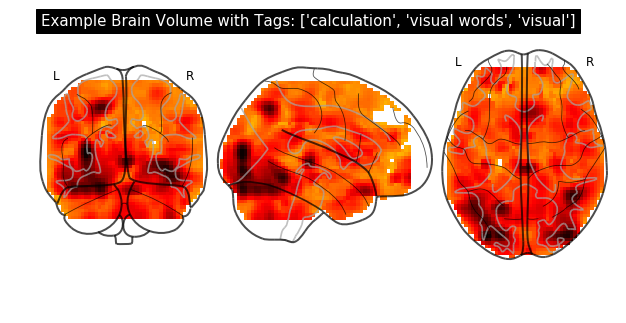

In [13]:
figure = plt.figure(figsize=(8, 4))
plotting.plot_glass_brain(stat_map_img=upsampled_example_brain_data,
                          threshold='auto',
                          title="Example Brain Volume with Tags: {0}".format(example_brain_data_decoded_tags),
                          figure=figure)
plt.show()

# Models

Setup model hyperparameters.

In [14]:
MODEL_DIMENSIONALITY = 64
CONDITONING_DIMENSIONALITY = 5

CRITIC_UPDATES_PER_GENERATOR_UPDATE = 1

NOISE_SAMPLE_LENGTH = 128

Construct models.

NOTE: Depending on the hyperparameter settings above, the dimensionality of the label vector, noise vector, and layers may not exactly match the figure below.

![ICW-fMRI-GAN Model Architecture](models/resources/architecture.png)

In [15]:
generator = Generator(input_size=NOISE_SAMPLE_LENGTH,
                      output_shape=brain_data_shape,
                      dimensionality=MODEL_DIMENSIONALITY,
                      num_classes=brain_data_tag_shape[0],
                      conditioning_dimensionality=CONDITONING_DIMENSIONALITY,
                      cudaEnabled=CUDA)
critic = Critic(dimensionality=MODEL_DIMENSIONALITY,
                num_classes=brain_data_tag_shape[0],
                conditioning_dimensionality=CONDITONING_DIMENSIONALITY,
                cudaEnabled=CUDA)

#### Load and Save Pretrained Models

In [16]:
generator_weight_path = 'models/weights/generator.pt'
critic_weight_path = 'models/weights/critic.pt'
epoch_weight_path = 'models/weights/epoch.npy'

In [17]:
def save_checkpoint(epoch):
    torch.save(generator.state_dict(), generator_weight_path)
    torch.save(critic.state_dict(), critic_weight_path)
    np.save(epoch_weight_path, epoch)

In [18]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def load_checkpoint():
    epochs_trained = 0
    if os.path.exists(generator_weight_path) and os.path.exists(critic_weight_path) and os.path.exists(epoch_weight_path):
        generator.load_state_dict(torch.load(generator_weight_path, map_location=DEVICE))
        critic.load_state_dict(torch.load(critic_weight_path, map_location=DEVICE))
        epochs_trained = np.load(epoch_weight_path) + 1
        print("Loaded models with {} epochs pretrained...".format(epochs_trained))
    else:
        print("Starting from scratch...")
    return epochs_trained

# Training

In [19]:
NUM_EPOCHS_TO_TRAIN = 10
LAMBDA = 10

Objective to optimize:

![ICW-fMRI-GAN Model Objective](models/resources/objective.png)

In [20]:
def noise(size, cuda=False):
    noise = torch.from_numpy(np.random.normal(0.0, size=size)).float()
    if cuda:
        noise = noise.cuda()
    return noise

In [21]:
def train(epoch):
    
    sum_critic_loss = 0.0
    sum_generator_loss = 0.0
    num_batches_in_epoch = all_brain_data.shape[0] // BATCH_SIZE
    
    for _ in tqdm(range(num_batches_in_epoch)):
        
        data_batch, label_batch = next(brainpedia_batch_generator)
        data_batch = Variable(data_batch)
        label_batch = Variable(label_batch)
                    
        # (1) Train critic to distinguish between real and synthetic brain samples
        for critic_step in range(CRITIC_UPDATES_PER_GENERATOR_UPDATE):

            # Generate synthetic data batch for true labels
            critic_noise_batch = Variable(noise(size=(label_batch.shape[0], NOISE_SAMPLE_LENGTH), cuda=CUDA))
            synthetic_data_batch = generator(critic_noise_batch, label_batch)
            
            # Train critic to distinguish between the real and synthetic brain samples
            critic_loss = critic.train(data_batch, synthetic_data_batch, label_batch, LAMBDA)
            sum_critic_loss += critic_loss.item()

        # (2) Train generator to fool critic
        generator_noise_batch = Variable(noise(size=(label_batch.shape[0], NOISE_SAMPLE_LENGTH), cuda=CUDA))
        synthetic_data_batch = generator(generator_noise_batch, label_batch)
        critic_predictions = critic(synthetic_data_batch, label_batch)
        generator_loss = generator.train(critic_predictions)
        sum_generator_loss += generator_loss.item()
                        
    return sum_critic_loss / num_batches_in_epoch, sum_generator_loss / num_batches_in_epoch

In [22]:
def visualize(epoch):
    
    for data_batch, label_batch in brainpedia_batch_generator:
        
        # Visualize real samples vs synthetic samples
        num_samples_to_visualize = min(data_batch.shape[0], 5)
        fig = plt.figure(figsize=(10*num_samples_to_visualize, 10))
        
        # Generate synthetic samples for labels
        noise_g = Variable(noise(size=(label_batch.shape[0], NOISE_SAMPLE_LENGTH), cuda=CUDA))
        synthetic_data_batch = generator(noise_g, label_batch)
        
        # Visualize comparison between real and synthetic samples
        subplot_idx = 1
        
        for sample_idx in range(num_samples_to_visualize):
            
            data = data_batch[sample_idx]
            synthetic_data = synthetic_data_batch[sample_idx]
            label = label_batch[sample_idx]
            
            data = data.cpu().data.numpy().squeeze()
            synthetic_data = synthetic_data.cpu().data.numpy().squeeze()
            label = brainpedia.preprocessor.decode_label(label)
            
            # Upsample 
            upsampled_data = invert_preprocessor_scaling(data, brainpedia.preprocessor)
            upsampled_synthetic_data = invert_preprocessor_scaling(synthetic_data, brainpedia.preprocessor)

            # Visualize samples
            ax = fig.add_subplot(2, num_samples_to_visualize, subplot_idx)
            plotting.plot_glass_brain(stat_map_img=upsampled_data,
                                      threshold='auto',
                                      title="True {0}".format(label),
                                      axes=ax)
            ax = fig.add_subplot(2, num_samples_to_visualize, subplot_idx+num_samples_to_visualize)
            plotting.plot_glass_brain(stat_map_img=upsampled_synthetic_data,
                                      threshold='auto',
                                      title="Synthetic {0}".format(label),
                                      axes=ax)
            subplot_idx += 1
        
        plt.show()
        break

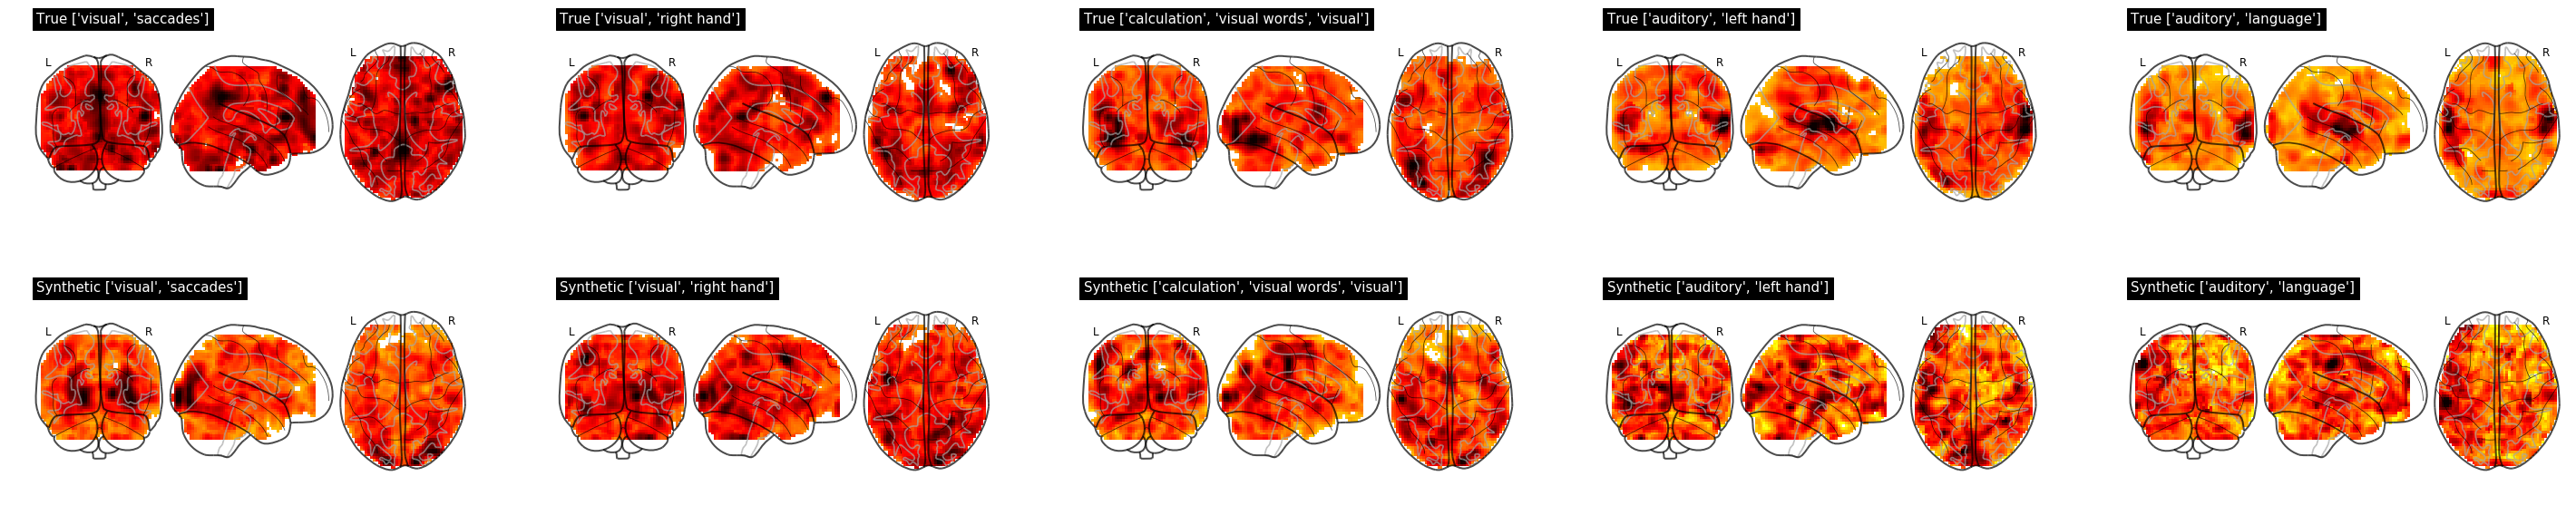

In [24]:
visualize(epoch)

In [23]:
epochs_pretrained = load_checkpoint()

for epoch in range(epochs_pretrained, epochs_pretrained+NUM_EPOCHS_TO_TRAIN):
    
    # Train for an epoch
    critic_loss, generator_loss = train(epoch)
    
    print("========= EPOCH {0} ==========".format(epoch))
    print("CRITIC LOSS   : {0:.4f}".format(critic_loss))
    print("GENERATOR LOSS: {0:.4f}\n".format(generator_loss))
    
    # Checkpoint model
    save_checkpoint(epoch)
    
    # Visualize model output
    visualize(epoch)
    

  0%|          | 0/51 [00:00<?, ?it/s]

Loaded models with 236 epochs pretrained...


 39%|███▉      | 20/51 [05:39<08:20, 16.14s/it]

KeyboardInterrupt: 